## Pré-traitement de la dataset des films

In [23]:
import pandas as pd
df = pd.read_csv('./tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


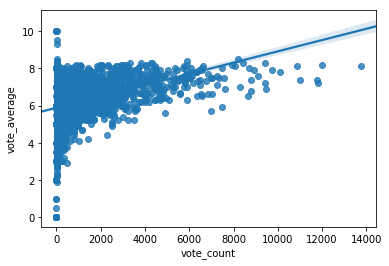

In [24]:
import seaborn as sns
import matplotlib as plt
sns.regplot(x="vote_count",y="vote_average",data=df)

In [25]:
from scipy.stats.stats import pearsonr
# Corrélation entre vote_count et vote_average
pearson_coef, p_value = pearsonr(df["vote_count"], df["vote_average"])
pearson_coef, p_value

(0.31299740399575976, 1.190920429291145e-109)

In [26]:
data = df[["budget",
"genres",
"original_language",
"popularity",
"release_date",
"revenue",
"runtime",
"vote_average",
"vote_count"]]
data.head()

,budget,genres,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,162.0,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,169.0,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,148.0,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,165.0,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,132.0,6.1,2124


In [27]:
import numpy as np
### Remplacer les exemples d'apprentissage de revenue 0 par la moyenne
data["revenue"] = data["revenue"].replace(0, np.nan)
data["revenue"] = data["revenue"].fillna(data["revenue"].mean())
### Remplacer les exemples d'apprentissage de budget 0 par la moyenne
data["budget"] = data["budget"].replace(0, np.nan)
data["budget"] = data["budget"].fillna(data["revenue"].mean())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A 

In [28]:
import json
from sklearn.preprocessing import MultiLabelBinarizer

### Binariser la feature "genres" avec One-Hot Encode Features de plusieurs labels
list_genres = []
for x in data['genres']:
    temp_list = []
    for y in json.loads(x):
        temp_list.append(y['name'])
    list_genres.append(temp_list)
    
one_hot = MultiLabelBinarizer()
ohe = one_hot.fit_transform(list_genres)
genres = pd.DataFrame(ohe, columns = one_hot.classes_) # 20 classes
#concatener les nouvelles colonnes avec la dataframe originale
data = pd.concat([data,genres],axis=1)
# Supprimer la colonne genres
data.drop(['genres'],axis=1, inplace=True)

data.head()

,budget,original_language,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000.0,en,150.437577,2009-12-10,2.787965e+09,162.0,7.2,11800,1,1,...,0,0,0,0,0,1,0,0,0,0
1,300000000.0,en,139.082615,2007-05-19,9.610000e+08,169.0,6.9,4500,1,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000.0,en,107.376788,2015-10-26,8.806746e+08,148.0,6.3,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000.0,en,112.312950,2012-07-16,1.084939e+09,165.0,7.6,9106,1,0,...,0,0,0,0,0,0,0,1,0,0
4,260000000.0,en,43.926995,2012-03-07,2.841391e+08,132.0,6.1,2124,1,1,...,0,0,0,0,0,1,0,0,0,0


In [29]:
### Extraire des features de la feature "release_date"
list_years = []
#list_months = []
#list_days = []

data['release_date'].isnull().sum().sum() # Un seul exemple ayant valeur NaN
data = data[data['release_date'].notnull()] # Supprimer cet exemple
for x in data['release_date']:
    y_m_d = x.split("-")
    list_years.append(y_m_d[0])
    #list_months.append(y_m_d[1])
    #list_days.append(y_m_d[2])

df_years = pd.DataFrame(list_years, columns=['years'])
#df_months = pd.DataFrame(list_months, columns=['months'])
#df_days = pd.DataFrame(list_days, columns=['days'])


#concatener les nouvelles colonnes avec la dataframe originale
data = pd.concat([data, df_years], axis=1)
# Supprimer la colonne production_countries
data.drop(['release_date'],axis=1, inplace=True)
data.head()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,years
0,237000000.0,en,150.437577,2.787965e+09,162.0,7.2,11800.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2009
1,300000000.0,en,139.082615,9.610000e+08,169.0,6.9,4500.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007
2,245000000.0,en,107.376788,8.806746e+08,148.0,6.3,4466.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015
3,250000000.0,en,112.312950,1.084939e+09,165.0,7.6,9106.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012
4,260000000.0,en,43.926995,2.841391e+08,132.0,6.1,2124.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2012


In [30]:
# Appliquer le one hot encoding sur la feature "original language"
df_processed = pd.get_dummies(data, prefix_sep="_", columns=["original_language"])
df_processed.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,original_language_ru,original_language_sl,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_vi,original_language_xx,original_language_zh
0,237000000.0,150.437577,2.787965e+09,162.0,7.2,11800.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,300000000.0,139.082615,9.610000e+08,169.0,6.9,4500.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,245000000.0,107.376788,8.806746e+08,148.0,6.3,4466.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,250000000.0,112.312950,1.084939e+09,165.0,7.6,9106.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,260000000.0,43.926995,2.841391e+08,132.0,6.1,2124.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from statistics import mean
import numpy as np

# Supprimer toutes les lignes ayant des valeurs nulles
df_processed = df_processed.dropna(axis=0)

# Remplacer les valeurs de la target 'vote_average' par 1 et 0
moyenne = mean(df_processed['vote_average'].values)
df_processed['vote_average'] = np.where(df_processed['vote_average']>moyenne, 1, 0)
Y = df_processed['vote_average']
X = df_processed.drop(['vote_average'], axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# La normalisation Min-Max
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(X)
#Convertir le tableau numpy à un dataframe
df_normalise = pd.DataFrame(x_norm, index=X.index, columns=X.columns) 
X.update(df_normalise)
print("X pré-traitée:\n {}".format(X[0:3]))
print("Taille de X: {}".format(X.shape))
print("Taille de Y: {}".format(Y.shape))

X pré-traitée:
      budget  popularity   revenue  runtime  vote_count  Action  Adventure  \
0  0.623684    0.171814  1.000000  0.47929    0.858057     1.0        1.0   
1  0.789474    0.158846  0.344696  0.50000    0.327225     1.0        1.0   
2  0.644737    0.122634  0.315884  0.43787    0.324753     1.0        1.0   

   Animation  Comedy  Crime          ...           original_language_ru  \
0        0.0     0.0    0.0          ...                            0.0   
1        0.0     0.0    0.0          ...                            0.0   
2        0.0     0.0    1.0          ...                            0.0   

   original_language_sl  original_language_sv  original_language_ta  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   

   original_language_te  original_language_th  original_language_tr  \
0                 

In [33]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
X_principalDf = pd.DataFrame(data = principalComponents)
X_principalDf.head()
"""
X_principalDf = pd.DataFrame(data = X)

In [34]:
%store X_principalDf
%store Y

Stored 'X_principalDf' (DataFrame)
Stored 'Y' (Series)
